# Problem Statement

Five million Americans are currently living with heart diseases, and the numbers are expected to rise. It is very important to understand the factors which causes Heart-attacks so that certain precaution can be taken by individuals. In-order to understand the reasons of the Heart-attack, a data was collected from various hospitals across US which is given in US_Heart_Patients.csv. In the data set there are Heart-Att indicates whether the person suffered from Heart attack or not.
Perform EDA on the data and build a model which will predict whether the person will suffer from Heart-attack or not.

Our Dataset has following variables:

1. **Gender**	        Male/Female
2. **age**             Age of the person
3. **education**       1 indicates High School, 2 indicates- Secondary School,3 indicates Graduation, 4 indicates Post Graduation
4. **currentSmoker**	1 Indicates person is a smoker and 0 indicates non- smoker
5. **cigsPerDay**    	Number of cigrattes consumed in a day
6. **BP Meds**	        1 indidates person is consuming BP medicines and 0 indicates person is not consuming BP medicines
7. **prevalentStroke**	1 indidates person had stroke in the past and 0 indicates person did not suffered from stroke in the past
8. **prevalentHyp**	1 indidates person is suffering from Hypertension  and 0 indicates person is not suffering from hypertension
9. **diabetes**	    1 indicates person is diabatic and 0 indicates person in non-diabetic
10. **tot cholesterol**	Indicates total cholesterol level in the body
11. **Systolic BP**	    Systolic BP of the person
12. **Diastolic BP**	Diastolic BP of the person
13. **BMI**	Indicates   BMI level in the body
14. **heartRate**	    Indicates body heartrate
15. **glucose**	        Glucose level of the body
16. **Heart-Att**	    1 Indicates  person suffered from Heart-attack and 0 indicates that person will not suffer from Heart-at



### Upload Required Libraries

In [1]:
import numpy as np   
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')

import warnings
warnings.filterwarnings("ignore")

### Importing data

In [119]:
## Load the csv file available in the working or specified directory
#os.chdir('C:\\GL Class\DSBA - Python\Machine Learning\Week 2')
#df = pd.read_csv("US_Heart_Patients.csv")
df = pd.read_csv("default_2k (1).csv")


### EDA

In [120]:
# Check top few records to get a feel of the data structure
df.head()

,default,student,balance,income
0,No,No,412.071615,48347.296982
1,No,Yes,579.721305,18555.752586
2,No,No,694.398583,36570.425441
3,No,No,0.000000,41933.095770
4,No,Yes,407.340440,25376.728632



#### Shape

In [121]:
print("no. of rows: ",df.shape[0], "\n""no. of columns: ",df.shape[1])

no. of rows:  1994 
no. of columns:  4


#### Data type of data features

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  1994 non-null   object 
 1   student  1994 non-null   object 
 2   balance  1994 non-null   float64
 3   income   1994 non-null   float64
dtypes: float64(2), object(2)
memory usage: 62.4+ KB


#### checking for Possible columns which are categorical but are not having data type "object"

In [123]:
df['education'].value_counts()

KeyError: 'education'

In [7]:
df['currentSmoker'].value_counts()

0.0    2143
1.0    2094
Name: currentSmoker, dtype: int64

In [8]:
df['BP Meds'].value_counts()

0.0    4056
1.0     124
Name: BP Meds, dtype: int64

In [9]:
df['prevalentStroke'].value_counts()

0.0    4206
1.0      25
Name: prevalentStroke, dtype: int64

In [10]:
df['prevalentHyp'].value_counts()

0.0    2922
1.0    1316
Name: prevalentHyp, dtype: int64

In [11]:
df['diabetes'].value_counts()

0.0    4129
1.0     109
Name: diabetes, dtype: int64

In [12]:
df['Heart-Att'].value_counts()

0    3596
1     644
Name: Heart-Att, dtype: int64

In [13]:
## Change the data types of these 7 features 

In [14]:
cat=["education","currentSmoker","BP Meds","prevalentStroke","prevalentHyp","diabetes"]

In [15]:
for i in cat:
    df[i]=df[i].astype("object")

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4232 non-null   object 
 1   age              4238 non-null   float64
 2   education        4130 non-null   object 
 3   currentSmoker    4237 non-null   object 
 4   cigsPerDay       4209 non-null   float64
 5   BP Meds          4180 non-null   object 
 6   prevalentStroke  4231 non-null   object 
 7   prevalentHyp     4238 non-null   object 
 8   diabetes         4238 non-null   object 
 9   tot cholesterol  4180 non-null   float64
 10  Systolic BP      4236 non-null   float64
 11  Diastolic BP     4235 non-null   float64
 12  BMI              4216 non-null   float64
 13  heartRate        4236 non-null   float64
 14  glucose          3849 non-null   float64
 15  Heart-Att        4240 non-null   int64  
dtypes: float64(8), int64(1), object(7)
memory usage: 530.1+ KB


#### Making different list for categorical columns and numerical columns


In [17]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

    

['Gender', 'education', 'currentSmoker', 'BP Meds', 'prevalentStroke', 'prevalentHyp', 'diabetes']
['age', 'cigsPerDay', 'tot cholesterol', 'Systolic BP', 'Diastolic BP', 'BMI', 'heartRate', 'glucose', 'Heart-Att']


#### Describe for numerical and categorical columns

In [18]:
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
age,4238.0,49.579283,8.572875,32.00,42.00,49.000,56.00,70.0
cigsPerDay,4209.0,9.001901,11.920742,0.00,0.00,0.000,20.00,70.0
tot cholesterol,4180.0,236.677273,44.616098,107.00,206.00,234.000,263.00,696.0
Systolic BP,4236.0,132.362370,22.039244,83.50,117.00,128.000,144.00,295.0
Diastolic BP,4235.0,82.901889,11.914467,48.00,75.00,82.000,90.00,142.5
BMI,4216.0,25.798916,4.075256,15.54,23.07,25.395,28.04,56.8
heartRate,4236.0,75.867800,11.999488,44.00,68.00,75.000,83.00,143.0
glucose,3849.0,81.951936,23.958428,40.00,71.00,78.000,87.00,394.0
Heart-Att,4240.0,0.151887,0.358953,0.00,0.00,0.000,0.00,1.0


In [19]:
df[cat].describe().T

,count,unique,top,freq
Gender,4232,2,Female,2414
education,4130,4,1,1717
currentSmoker,4237,2,0,2143
BP Meds,4180,2,0,4056
prevalentStroke,4231,2,0,4206
prevalentHyp,4238,2,0,2922
diabetes,4238,2,0,4129


### unique values for categorical variables

In [20]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

GENDER :  2
Male      1818
Female    2414
Name: Gender, dtype: int64


EDUCATION :  4
4.0     473
3.0     688
2.0    1252
1.0    1717
Name: education, dtype: int64


CURRENTSMOKER :  2
1.0    2094
0.0    2143
Name: currentSmoker, dtype: int64


BP MEDS :  2
1.0     124
0.0    4056
Name: BP Meds, dtype: int64


PREVALENTSTROKE :  2
1.0      25
0.0    4206
Name: prevalentStroke, dtype: int64


PREVALENTHYP :  2
1.0    1316
0.0    2922
Name: prevalentHyp, dtype: int64


DIABETES :  2
1.0     109
0.0    4129
Name: diabetes, dtype: int64




In [21]:
# Are there any missing values ?
df.isnull().sum()

Gender               8
age                  2
education          110
currentSmoker        3
cigsPerDay          31
BP Meds             60
prevalentStroke      9
prevalentHyp         2
diabetes             2
tot cholesterol     60
Systolic BP          4
Diastolic BP         5
BMI                 24
heartRate            4
glucose            391
Heart-Att            0
dtype: int64

In [22]:
## All independent features have missing values

In [23]:
## Are there any duplicate records

# Check for duplicate data

dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 0


,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att


In [24]:
## Let's rename columns to remove space before we impute
df.rename(columns = {"BP Meds": "BPMeds","tot cholesterol": "tot_cholesterol","Systolic BP":"Systolic_BP","Diastolic BP":"Diastolic_BP"},inplace=True)

## Imputation of all missing values with the bext possible option

In [25]:
df.Gender.mode()

0    Female
dtype: object

In [26]:
df.Gender=df.Gender.fillna("Female")

**Imputing the object variables in a loop using mode. Important to note that after imputation these variables will become numeric as the imputation values are numbers and hence the same needs to be converted in to object one more time.**

In [27]:
for column in ['education','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes']:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [28]:
cat1=["education","currentSmoker","BPMeds","prevalentStroke","prevalentHyp","diabetes"]

In [29]:
for i in cat1:
    df[i]=df[i].astype("object")

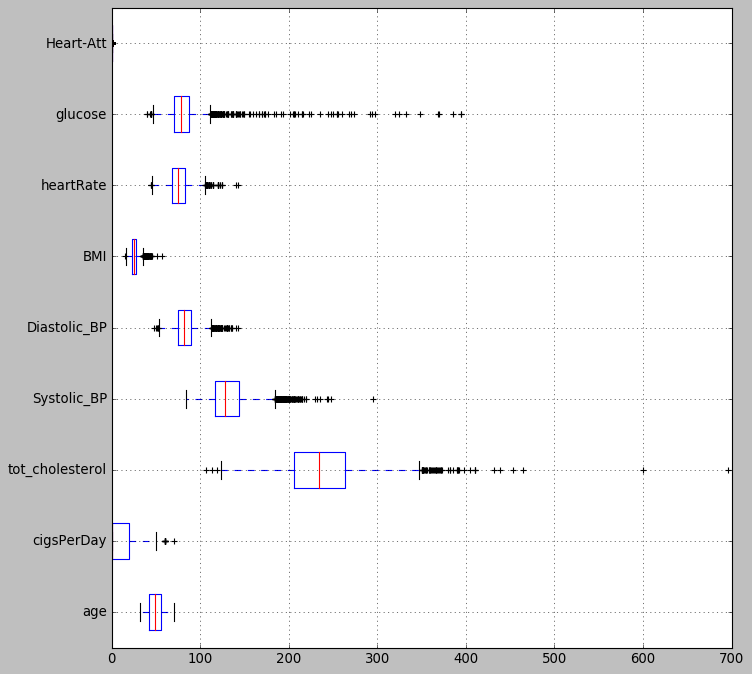

In [30]:
# construct box plot for continuous variables
plt.figure(figsize=(10,10))
df.boxplot(vert=0)
plt.show()


#### No possible outliers are present here in "age", we will use mean to impute null values in "age" column

In [31]:
df.age=df.age.fillna(df.age.mean())

In [32]:
#All other variables have possible ouliers and hence median would be used for imputaiton

In [33]:
impute=['cigsPerDay','tot_cholesterol','Systolic_BP','Diastolic_BP','BMI','heartRate','glucose']

In [34]:
for i in impute:
    df[i].fillna(df[i].median(),inplace=True)

In [35]:
df.isnull().sum()

Gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
tot_cholesterol    0
Systolic_BP        0
Diastolic_BP       0
BMI                0
heartRate          0
glucose            0
Heart-Att          0
dtype: int64

In [36]:
### All null values have been appropriately imputed

In [37]:
## Recheck the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4240 non-null   object 
 1   age              4240 non-null   float64
 2   education        4240 non-null   object 
 3   currentSmoker    4240 non-null   object 
 4   cigsPerDay       4240 non-null   float64
 5   BPMeds           4240 non-null   object 
 6   prevalentStroke  4240 non-null   object 
 7   prevalentHyp     4240 non-null   object 
 8   diabetes         4240 non-null   object 
 9   tot_cholesterol  4240 non-null   float64
 10  Systolic_BP      4240 non-null   float64
 11  Diastolic_BP     4240 non-null   float64
 12  BMI              4240 non-null   float64
 13  heartRate        4240 non-null   float64
 14  glucose          4240 non-null   float64
 15  Heart-Att        4240 non-null   int64  
dtypes: float64(8), int64(1), object(7)
memory usage: 530.1+ KB


In [38]:
## Recheck the unique values
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

GENDER :  2
Male      1818
Female    2422
Name: Gender, dtype: int64


EDUCATION :  4
4.0     473
3.0     688
2.0    1252
1.0    1827
Name: education, dtype: int64


CURRENTSMOKER :  2
1.0    2094
0.0    2146
Name: currentSmoker, dtype: int64


BPMEDS :  2
1.0     124
0.0    4116
Name: BPMeds, dtype: int64


PREVALENTSTROKE :  2
1.0      25
0.0    4215
Name: prevalentStroke, dtype: int64


PREVALENTHYP :  2
1.0    1316
0.0    2924
Name: prevalentHyp, dtype: int64


DIABETES :  2
1.0     109
0.0    4131
Name: diabetes, dtype: int64




In [39]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)


['Gender', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']
['age', 'cigsPerDay', 'tot_cholesterol', 'Systolic_BP', 'Diastolic_BP', 'BMI', 'heartRate', 'glucose', 'Heart-Att']


### Univariate Analysis

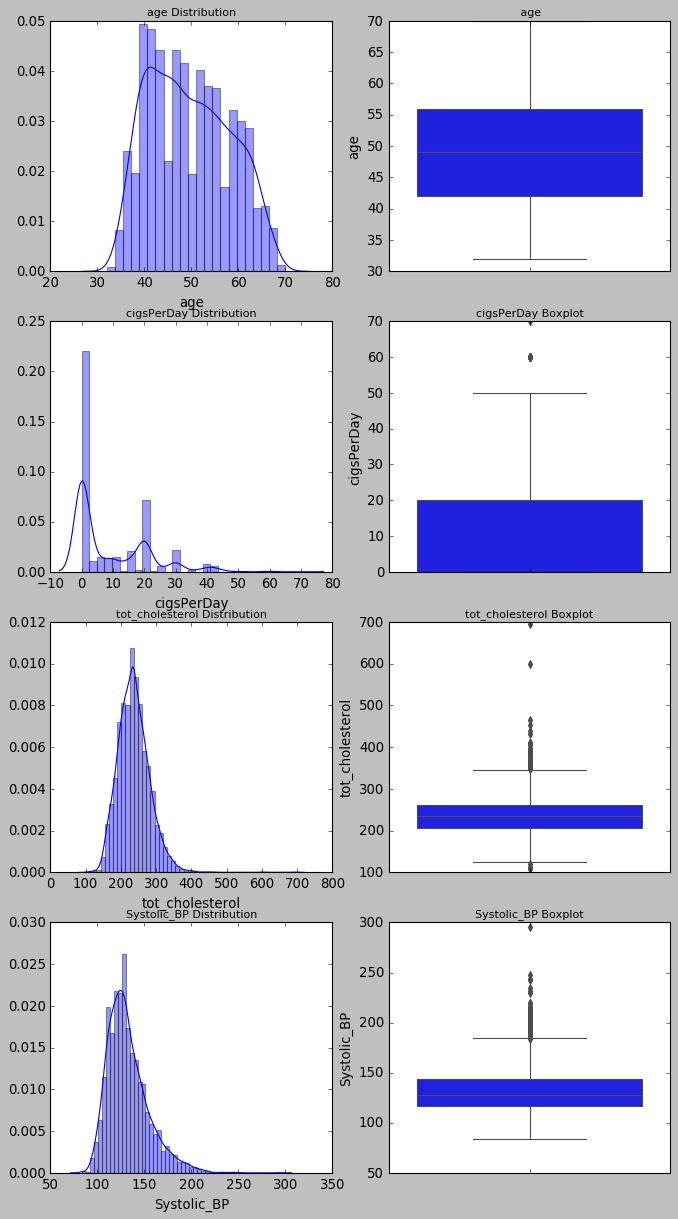

In [40]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(10,18)
a = sns.distplot(df['age'] , ax=axes[0][0])
a.set_title("age Distribution",fontsize=10)

a = sns.boxplot(df['age'] , orient = "v" , ax=axes[0][1])
a.set_title(" age",fontsize=10)

a = sns.distplot(df['cigsPerDay'] , ax=axes[1][0])
a.set_title("cigsPerDay Distribution",fontsize=10)

a = sns.boxplot(df['cigsPerDay'] , orient = "v" , ax=axes[1][1])
a.set_title("cigsPerDay Boxplot",fontsize=10)


a = sns.distplot(df['tot_cholesterol'] , ax=axes[2][0])
a.set_title("tot_cholesterol Distribution",fontsize=10)

a = sns.boxplot(df['tot_cholesterol'] , orient = "v" , ax=axes[2][1])
a.set_title("tot_cholesterol Boxplot",fontsize=10)


a = sns.distplot(df['Systolic_BP'] , ax=axes[3][0])
a.set_title("Systolic_BP Distribution",fontsize=10)

a = sns.boxplot(df['Systolic_BP'] , orient = "v" , ax=axes[3][1])
a.set_title("Systolic_BP Boxplot",fontsize=10)

plt.show()

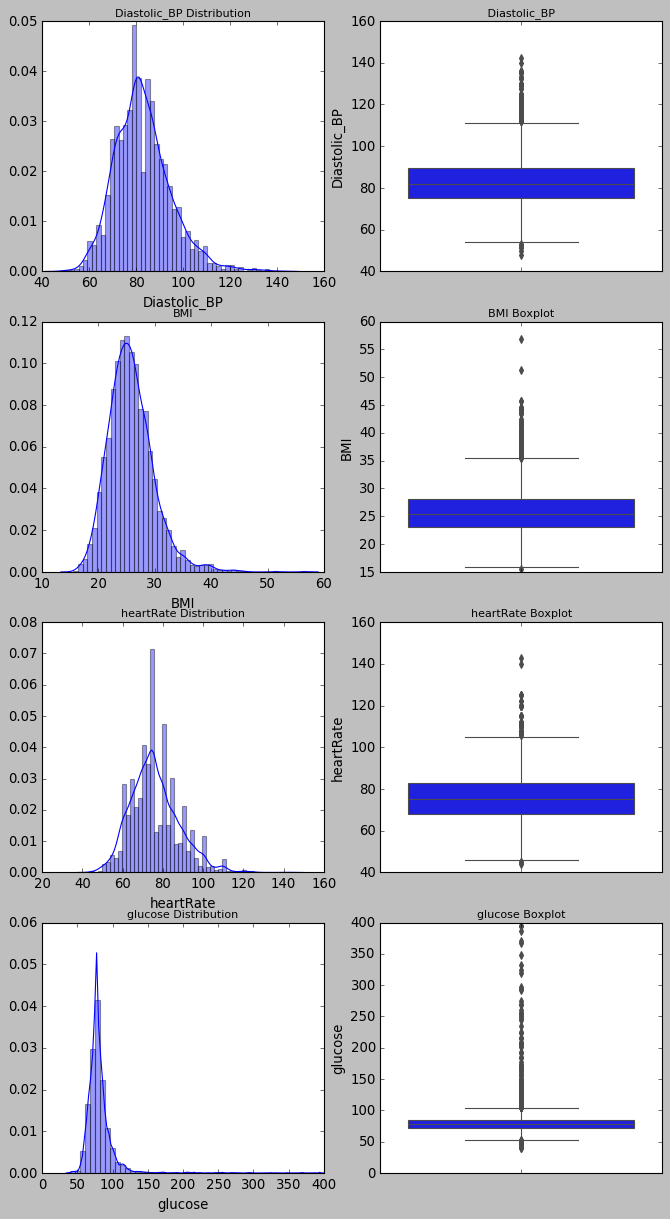

In [41]:

fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(10,18)
a = sns.distplot(df['Diastolic_BP'] , ax=axes[0][0])
a.set_title("Diastolic_BP Distribution",fontsize=10)

a = sns.boxplot(df['Diastolic_BP'] , orient = "v" , ax=axes[0][1])
a.set_title(" Diastolic_BP ",fontsize=10)

a = sns.distplot(df['BMI'] , ax=axes[1][0])
a.set_title("BMI",fontsize=10)

a = sns.boxplot(df['BMI'] , orient = "v" , ax=axes[1][1])
a.set_title("BMI Boxplot",fontsize=10)


a = sns.distplot(df['heartRate'] , ax=axes[2][0])
a.set_title("heartRate Distribution",fontsize=10)

a = sns.boxplot(df['heartRate'] , orient = "v" , ax=axes[2][1])
a.set_title("heartRate Boxplot",fontsize=10)


a = sns.distplot(df['glucose'] , ax=axes[3][0])
a.set_title("glucose Distribution",fontsize=10)

a = sns.boxplot(df['glucose'] , orient = "v" , ax=axes[3][1])
a.set_title("glucose Boxplot",fontsize=10)

plt.show()

**There are some possible outliers and the same would be treated accordingly. Skewness is not observed in the continuous variables**

###  Bivariate and Multivariate Analysis

In [42]:
print(num)

['age', 'cigsPerDay', 'tot_cholesterol', 'Systolic_BP', 'Diastolic_BP', 'BMI', 'heartRate', 'glucose', 'Heart-Att']


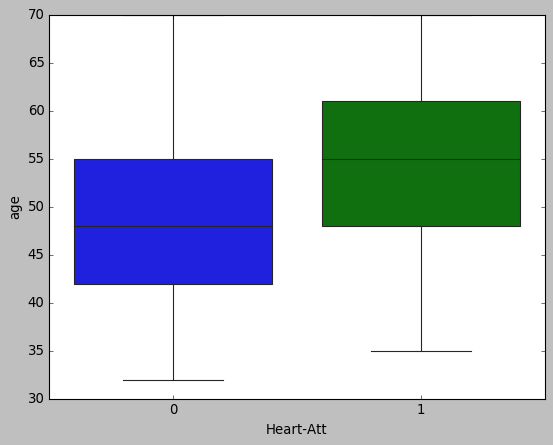

In [43]:
sns.boxplot(df["Heart-Att"],df['age'])

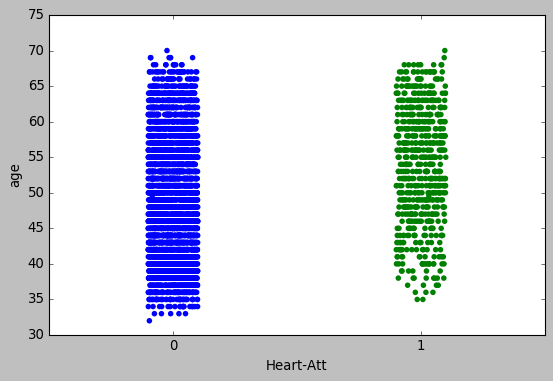

In [44]:
plt.figure(figsize=(8,5))
sns.stripplot(df["Heart-Att"], df['age'], jitter=True) 
plt.show()

**Younger people have less probability of Heart Attack. This pattern is clearly visible, However probability of heart attack is low even for old age people, as per the above strip plot.**

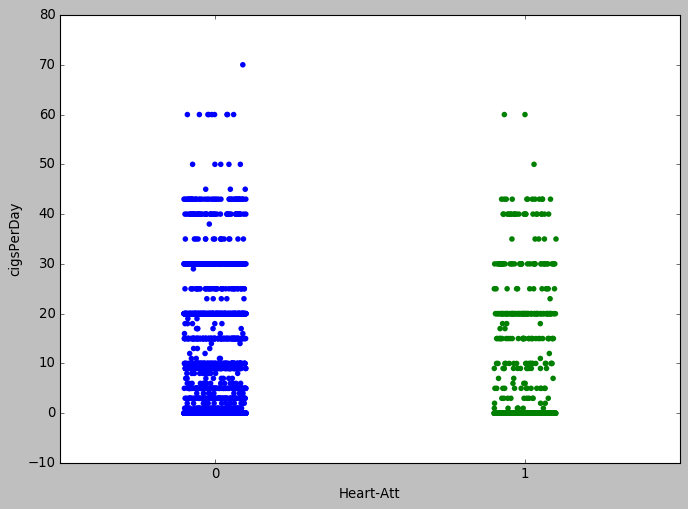

In [45]:
plt.figure(figsize=(10,7))
sns.stripplot(df["Heart-Att"], df['cigsPerDay'], jitter=True)  ### Distribution of values
plt.show()

**Less count of cigperday, lesser probability of heart attack. However data set has records wherein probability of heart attack is zero and total count of cigperday is quite high**

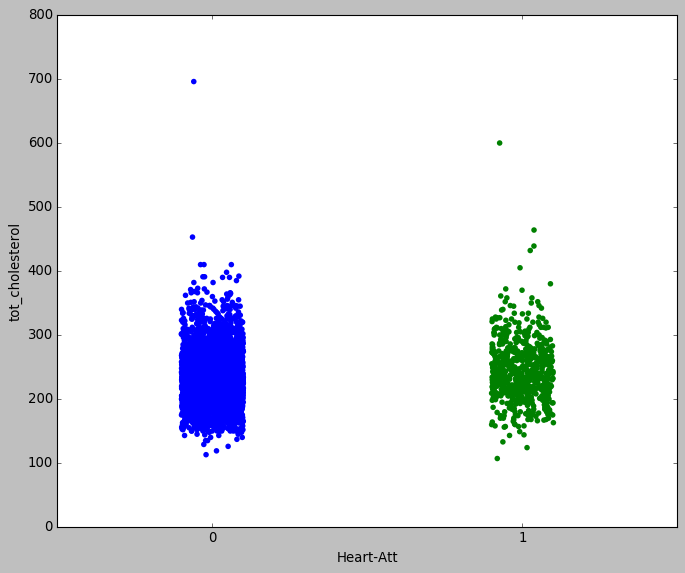

In [46]:
plt.figure(figsize=(10,8))
sns.stripplot(df["Heart-Att"], df['tot_cholesterol'], jitter=True) ### Distribution of values
plt.show()

**Less total cholesterol , less chances of Heart Attack.  Density is high for Heart Attack =1 when total cholesterol is high.**

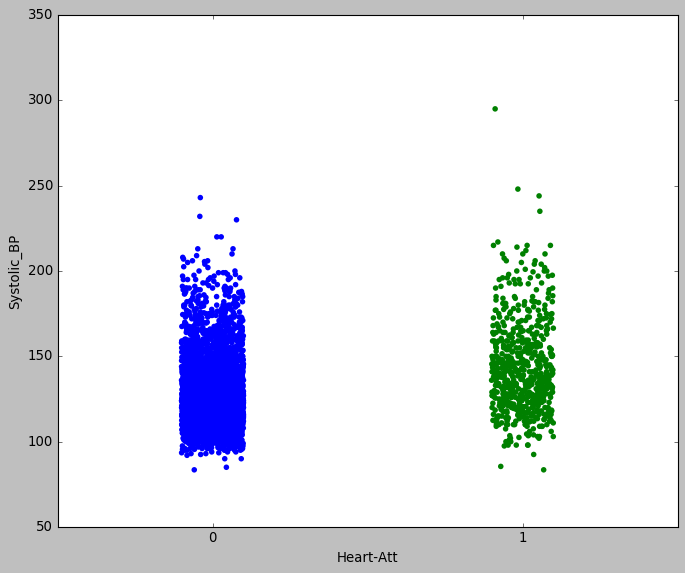

In [47]:
plt.figure(figsize=(10,8))
sns.stripplot(df["Heart-Att"], df['Systolic_BP'], jitter=True) 
plt.show()

**Low systolic BP , less chances of Heart Attack.  However even if systolic BP is high, chances of Heart Attack is low.**


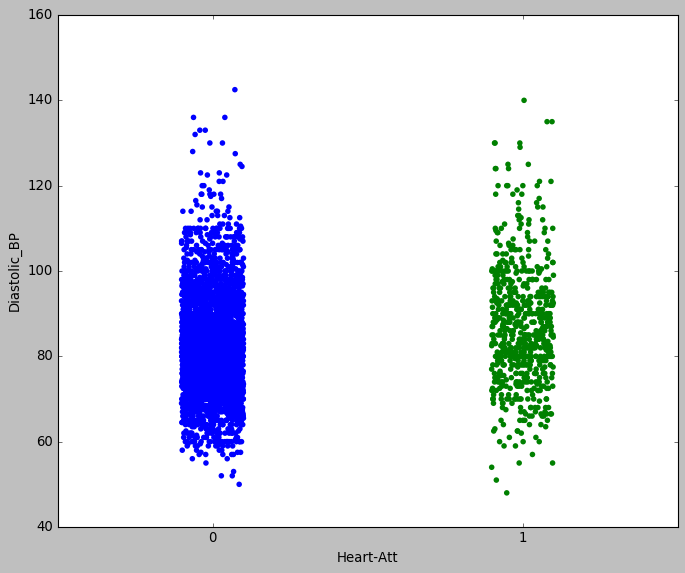

In [48]:
plt.figure(figsize=(10,8))
sns.stripplot(df["Heart-Att"], df['Diastolic_BP'], jitter=True)  ### Distribution of values
plt.show()

In [49]:
# Pattern is similar to systolic BP.

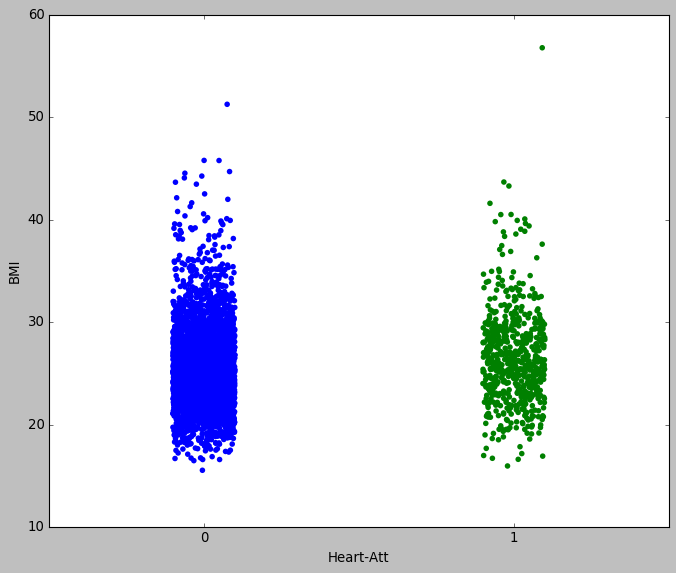

In [50]:
plt.figure(figsize=(10,8))
sns.stripplot(df["Heart-Att"], df['BMI'], jitter=True) 
plt.show()

**Low BMI has low chances of Heart Attack. However the data set has good number of records wherein BMI is low and individuals have suffered heart attack. Need to compare this with other parameters.**

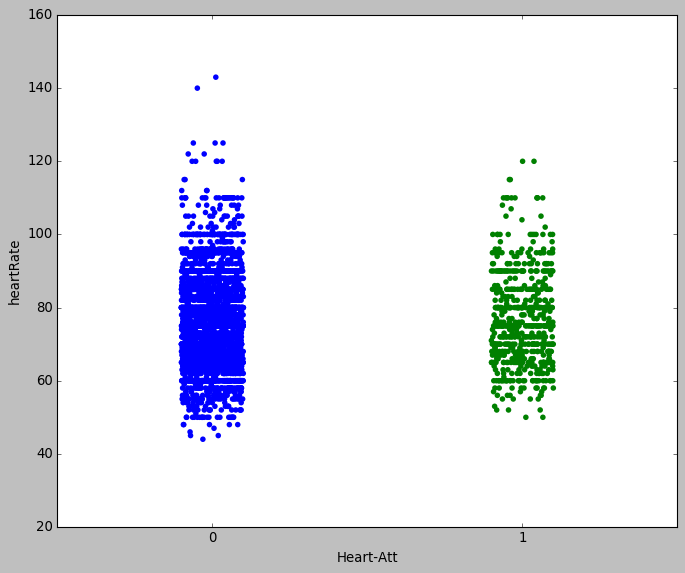

In [51]:
plt.figure(figsize=(10,8))
sns.stripplot(df["Heart-Att"], df['heartRate'], jitter=True) 
plt.show()

**Lesser heart rate less chances of heart attack. Very clear pattern visible**

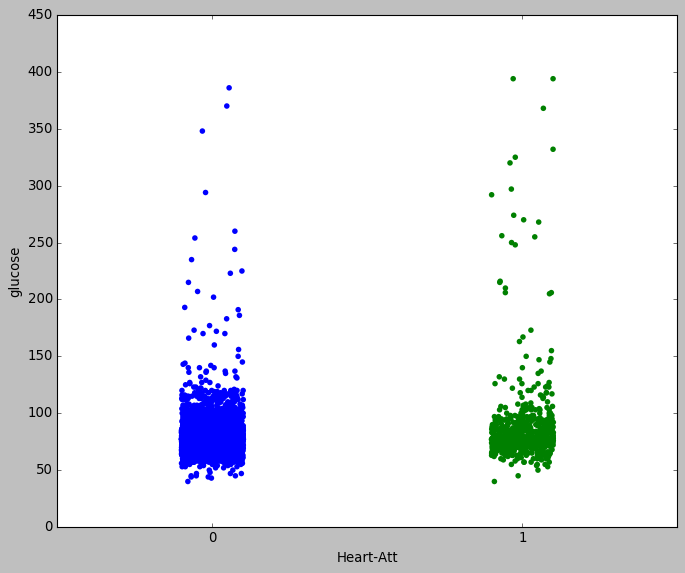

In [52]:
plt.figure(figsize=(10,8))
sns.stripplot(df["Heart-Att"], df['glucose'], jitter=True) 
plt.show()

In [53]:
## Higher value of glucose, higher chances of heart attack

### Correlation Plot

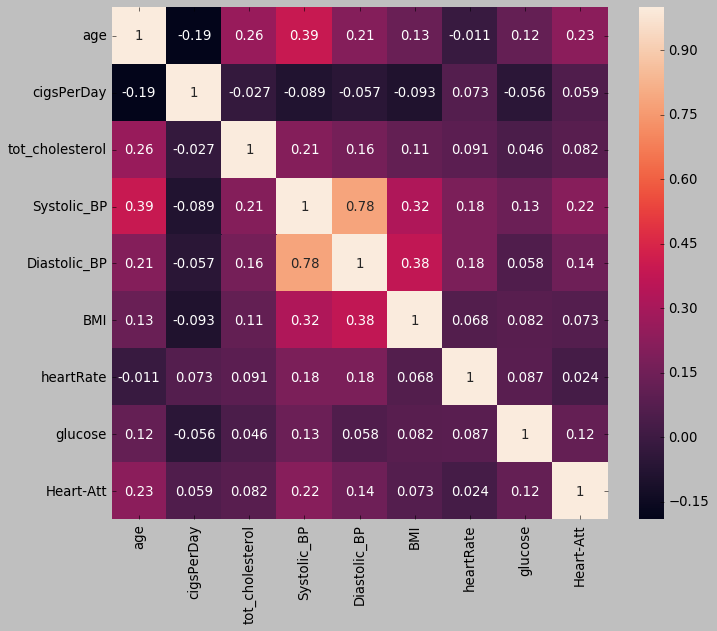

In [54]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

As expected, systolic BP and Diastolic BP are highly correlated. One of them would be dropped.

In [55]:
# Dropping Systolic_BP
df.drop(['Systolic_BP'], axis = 1,inplace=True)

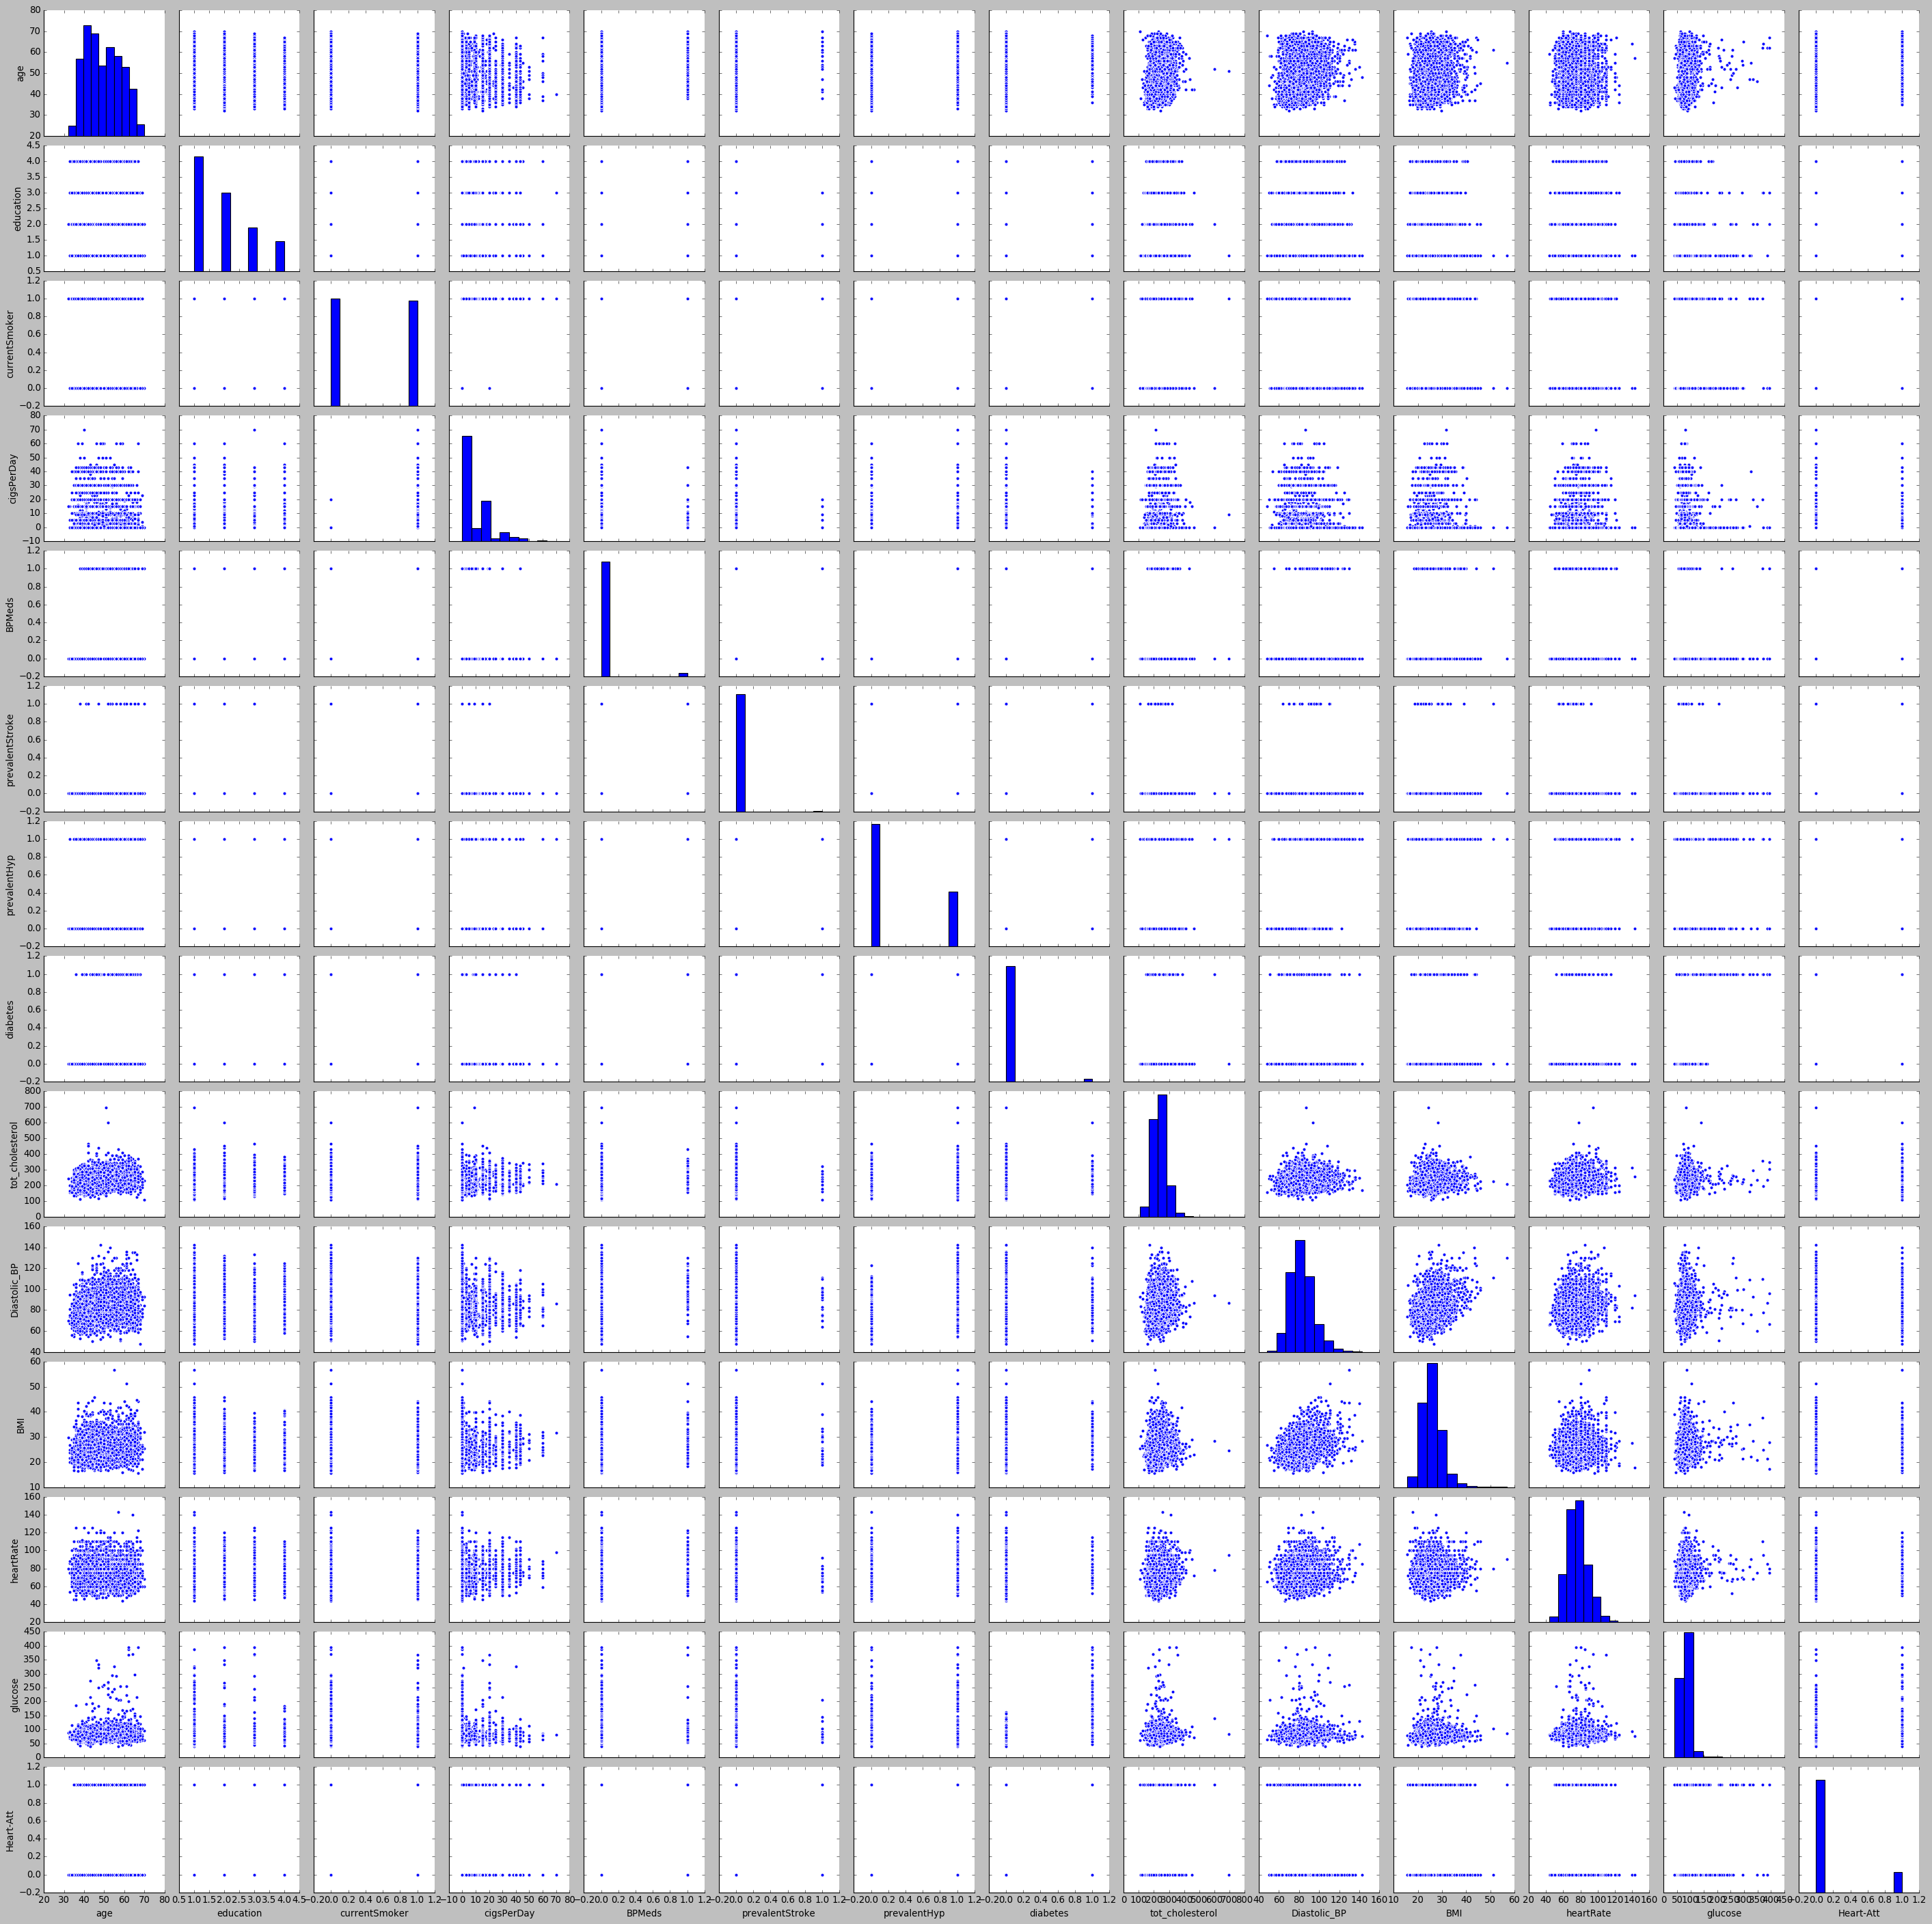

In [56]:
sns.pairplot(df)

In [57]:
#### get_dummies of the object variables

In [58]:
print(cat)

['Gender', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']


**Drop First is used to ensure that multiple columns created based on the levels of categorical variable are not included else it will result in to 
multicollinearity . This is done to ensure that we do not land in to dummy trap.**

In [59]:
df =pd.get_dummies(df, columns=cat,drop_first=True)

In [60]:
df.head()

,age,cigsPerDay,tot_cholesterol,Diastolic_BP,BMI,heartRate,glucose,Heart-Att,Gender_Male,education_2.0,education_3.0,education_4.0,currentSmoker_1.0,BPMeds_1.0,prevalentStroke_1.0,prevalentHyp_1.0,diabetes_1.0
0,39.0,0.0,195.0,70.0,26.97,80.0,77.0,0,1,0,0,1,0,0,0,0,0
1,46.0,0.0,250.0,81.0,28.73,95.0,76.0,0,0,1,0,0,0,0,0,0,0
2,48.0,20.0,245.0,80.0,25.34,75.0,70.0,0,1,0,0,0,1,0,0,0,0
3,61.0,30.0,225.0,95.0,28.58,65.0,103.0,1,0,0,1,0,1,0,0,1,0
4,46.0,23.0,285.0,84.0,23.10,85.0,85.0,0,0,0,1,0,1,0,0,0,0


### Outlier Checks

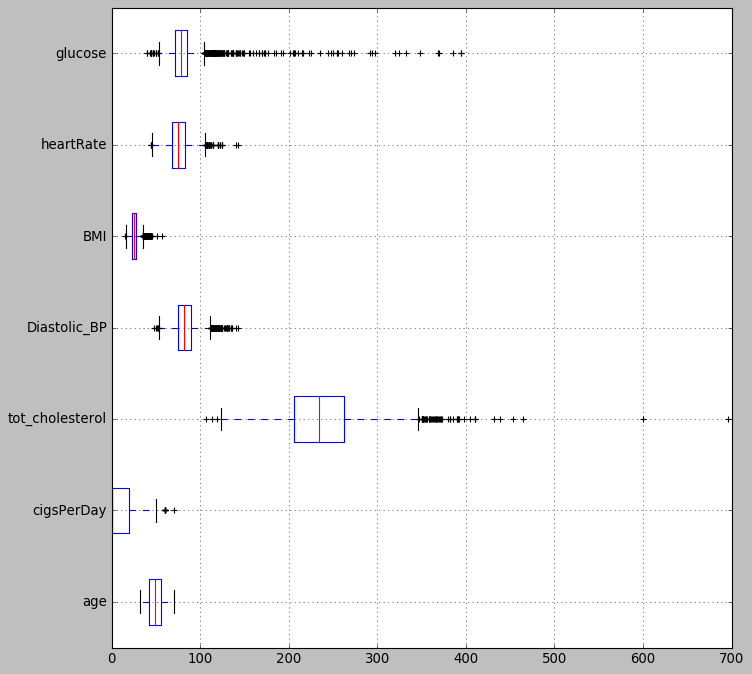

In [61]:
# construct box plot for continuous variables
plt.figure(figsize=(10,10))
df.iloc[:,:7].boxplot(vert=0)
plt.show()

**Except for age, all other continuous variables have possible outliers**

### outlier treatment

In [62]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [63]:
for column in df.iloc[:, 1:7].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

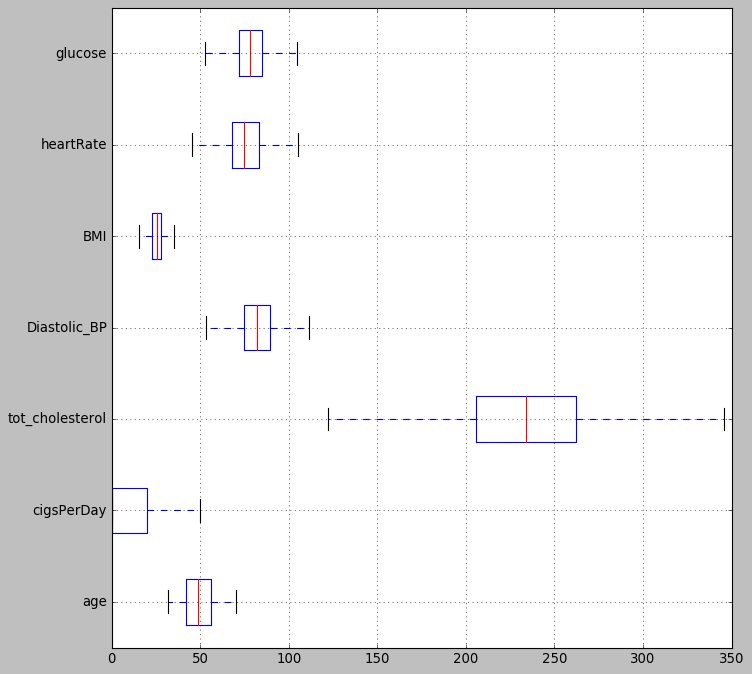

In [64]:
plt.figure(figsize=(10,10))
df.iloc[:, 0:7].boxplot(vert=0)

### Scaling the variables as continuous variables have different weightage using min-max technique

In [65]:
print(num)

['age', 'cigsPerDay', 'tot_cholesterol', 'Systolic_BP', 'Diastolic_BP', 'BMI', 'heartRate', 'glucose', 'Heart-Att']


In [66]:
num1=['age', 'cigsPerDay', 'tot_cholesterol', 'Diastolic_BP', 'BMI', 'heartRate', 'glucose'] 
### removing the correlated variable which was dropped earlier and target variable


In [67]:
df[num1] = df[num1].apply(lambda x:(x-x.min()) / (x.max()-x.min()))

In [68]:
## Check if the variables have been scaled or not
df.head()

,age,cigsPerDay,tot_cholesterol,Diastolic_BP,BMI,heartRate,glucose,Heart-Att,Gender_Male,education_2.0,education_3.0,education_4.0,currentSmoker_1.0,BPMeds_1.0,prevalentStroke_1.0,prevalentHyp_1.0,diabetes_1.0
0,0.184211,0.00,0.325893,0.289530,0.571862,0.575000,0.471154,0,1,0,0,1,0,0,0,0,0
1,0.368421,0.00,0.571429,0.477564,0.660931,0.825000,0.451923,0,0,1,0,0,0,0,0,0,0
2,0.421053,0.40,0.549107,0.460470,0.489372,0.491667,0.336538,0,1,0,0,0,1,0,0,0,0
3,0.763158,0.60,0.459821,0.716880,0.653340,0.325000,0.971154,1,0,0,1,0,1,0,0,1,0
4,0.368421,0.46,0.727679,0.528846,0.376012,0.658333,0.625000,0,0,0,1,0,1,0,0,0,0


### Train-Test Split

In [69]:
df.columns

Index(['age', 'cigsPerDay', 'tot_cholesterol', 'Diastolic_BP', 'BMI',
       'heartRate', 'glucose', 'Heart-Att', 'Gender_Male', 'education_2.0',
       'education_3.0', 'education_4.0', 'currentSmoker_1.0', 'BPMeds_1.0',
       'prevalentStroke_1.0', 'prevalentHyp_1.0', 'diabetes_1.0'],
      dtype='object')

In [70]:
# Copy all the predictor variables into X dataframe
X = df.drop('Heart-Att', axis=1)

# Copy target into the y dataframe.  
y = df['Heart-Att']

In [71]:
X.head()

,age,cigsPerDay,tot_cholesterol,Diastolic_BP,BMI,heartRate,glucose,Gender_Male,education_2.0,education_3.0,education_4.0,currentSmoker_1.0,BPMeds_1.0,prevalentStroke_1.0,prevalentHyp_1.0,diabetes_1.0
0,0.184211,0.00,0.325893,0.289530,0.571862,0.575000,0.471154,1,0,0,1,0,0,0,0,0
1,0.368421,0.00,0.571429,0.477564,0.660931,0.825000,0.451923,0,1,0,0,0,0,0,0,0
2,0.421053,0.40,0.549107,0.460470,0.489372,0.491667,0.336538,1,0,0,0,1,0,0,0,0
3,0.763158,0.60,0.459821,0.716880,0.653340,0.325000,0.971154,0,0,1,0,1,0,0,1,0
4,0.368421,0.46,0.727679,0.528846,0.376012,0.658333,0.625000,0,0,1,0,1,0,0,0,0


In [72]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: Heart-Att, dtype: int64

In [73]:
# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 , random_state=1)

### Naive Bayes Model

In [74]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [75]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [76]:
## Performance Matrix on train data set
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))


0.8317610062893082
[[2571  127]
 [ 408   74]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.91      2698
           1       0.37      0.15      0.22       482

    accuracy                           0.83      3180
   macro avg       0.62      0.55      0.56      3180
weighted avg       0.79      0.83      0.80      3180



In [77]:
y_test.value_counts()

0    898
1    162
Name: Heart-Att, dtype: int64

In [78]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8311320754716981
[[853  45]
 [134  28]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.91       898
           1       0.38      0.17      0.24       162

    accuracy                           0.83      1060
   macro avg       0.62      0.56      0.57      1060
weighted avg       0.79      0.83      0.80      1060





## Discriminant Analysis

In [79]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA_model= LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [80]:
## Performance Matrix on train data set
y_train_predict = LDA_model.predict(X_train)
model_score = LDA_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8487421383647799
[[2669   29]
 [ 452   30]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2698
           1       0.51      0.06      0.11       482

    accuracy                           0.85      3180
   macro avg       0.68      0.53      0.51      3180
weighted avg       0.80      0.85      0.80      3180



In [81]:
## Performance Matrix on test data set
y_test_predict = LDA_model.predict(X_test)
model_score = LDA_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8509433962264151
[[889   9]
 [149  13]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       898
           1       0.59      0.08      0.14       162

    accuracy                           0.85      1060
   macro avg       0.72      0.54      0.53      1060
weighted avg       0.82      0.85      0.80      1060



## Ada Boost

In [82]:
from sklearn.ensemble import AdaBoostClassifier


ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [83]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8569182389937107
[[2674   24]
 [ 431   51]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2698
           1       0.68      0.11      0.18       482

    accuracy                           0.86      3180
   macro avg       0.77      0.55      0.55      3180
weighted avg       0.83      0.86      0.81      3180



In [84]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8424528301886792
[[882  16]
 [151  11]]
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       898
           1       0.41      0.07      0.12       162

    accuracy                           0.84      1060
   macro avg       0.63      0.53      0.51      1060
weighted avg       0.79      0.84      0.79      1060



## Gradient Boosting

In [85]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [86]:
## Performance Matrix on train data set
y_train_predict = gbcl.predict(X_train)
model_score = gbcl.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8786163522012579
[[2695    3]
 [ 383   99]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93      2698
           1       0.97      0.21      0.34       482

    accuracy                           0.88      3180
   macro avg       0.92      0.60      0.64      3180
weighted avg       0.89      0.88      0.84      3180



In [87]:
## Performance Matrix on test data set
y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8518867924528302
[[889   9]
 [148  14]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       898
           1       0.61      0.09      0.15       162

    accuracy                           0.85      1060
   macro avg       0.73      0.54      0.54      1060
weighted avg       0.82      0.85      0.80      1060



## KNN Model

In [88]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [89]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8613207547169811
[[2655   43]
 [ 398   84]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2698
           1       0.66      0.17      0.28       482

    accuracy                           0.86      3180
   macro avg       0.77      0.58      0.60      3180
weighted avg       0.84      0.86      0.83      3180



In [90]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8320754716981132
[[873  25]
 [153   9]]
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       898
           1       0.26      0.06      0.09       162

    accuracy                           0.83      1060
   macro avg       0.56      0.51      0.50      1060
weighted avg       0.76      0.83      0.78      1060



## Decision Tree

In [91]:
from sklearn import tree


DT_model= tree.DecisionTreeClassifier()
DT_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [92]:
## Performance Matrix on train data set
y_train_predict = DT_model.predict(X_train)
model_score = DT_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[2698    0]
 [   0  482]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2698
           1       1.00      1.00      1.00       482

    accuracy                           1.00      3180
   macro avg       1.00      1.00      1.00      3180
weighted avg       1.00      1.00      1.00      3180



In [93]:
## Performance Matrix on test data set
y_test_predict = DT_model.predict(X_test)
model_score = DT_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7641509433962265
[[767 131]
 [119  43]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       898
           1       0.25      0.27      0.26       162

    accuracy                           0.76      1060
   macro avg       0.56      0.56      0.56      1060
weighted avg       0.77      0.76      0.77      1060



## Random Forest

In [94]:

from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [95]:
## Performance Matrix on train data set
y_train_predict = RF_model.predict(X_train)
model_score =RF_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[2698    0]
 [   0  482]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2698
           1       1.00      1.00      1.00       482

    accuracy                           1.00      3180
   macro avg       1.00      1.00      1.00      3180
weighted avg       1.00      1.00      1.00      3180



In [96]:
## Performance Matrix on test data set
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8443396226415094
[[886  12]
 [153   9]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       898
           1       0.43      0.06      0.10       162

    accuracy                           0.84      1060
   macro avg       0.64      0.52      0.51      1060
weighted avg       0.79      0.84      0.79      1060



## Bagging

In [97]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=1)

In [98]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[2698    0]
 [   0  482]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2698
           1       1.00      1.00      1.00       482

    accuracy                           1.00      3180
   macro avg       1.00      1.00      1.00      3180
weighted avg       1.00      1.00      1.00      3180



In [99]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8386792452830188
[[876  22]
 [149  13]]
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       898
           1       0.37      0.08      0.13       162

    accuracy                           0.84      1060
   macro avg       0.61      0.53      0.52      1060
weighted avg       0.78      0.84      0.79      1060



## Comparison of Different Models

Interest Class is 1 i.e. Heart_Att = 1

Let's look at the performance of all the models on the Train Data set

Recall refers to the percentage of total relevant results correctly classified by the algorithm and hence we will compare Recall of class "1" for all models.

Naive Bayes - Recall for class "1" is .15 


                 precision    recall  f1-score   support

           0       0.86      0.95      0.91      2698
           1       0.37      0.15      0.22       482

    accuracy                           0.83      3180
   macro avg       0.62      0.55      0.56      3180
weighted avg       0.79      0.83      0.80      3180





Linear Discriminant Analysis  - Recall for class "1" is  0.06

                precision    recall  f1-score   support

           0       0.86      0.99      0.92      2698
           1       0.51      0.06      0.11       482

    accuracy                           0.85      3180
   macro avg       0.68      0.53      0.51      3180
weighted avg       0.80      0.85      0.80      3180

ADA Boosting  - Recall for class "1" is  0.11


                precision    recall  f1-score   support

           0       0.86      0.99      0.92      2698
           1       0.72      0.11      0.19       482

    accuracy                           0.86      3180
   macro avg       0.79      0.55      0.56      3180
weighted avg       0.84      0.86      0.81      3180

Gradient Boosting - Recall for class "1" is 0.20

                precision    recall  f1-score   support

           0       0.87      1.00      0.93      2698
           1       0.97      0.20      0.32       482

    accuracy                           0.88      3180
   macro avg       0.92      0.60      0.63      3180
weighted avg       0.89      0.88      0.84      3180



KNN  - Recall for class "1" is  0.17

             precision    recall  f1-score   support

           0       0.87      0.98      0.92      2698
           1       0.66      0.17      0.28       482

    accuracy                           0.86      3180
   macro avg       0.77      0.58      0.60      3180
weighted avg       0.84      0.86      0.83      3180

Decision Tree  - Recall for class "1" is  1 (100%)

             precision    recall  f1-score   support

           0       1.00      1.00      1.00      2698
           1       1.00      1.00      1.00       482

    accuracy                           1.00      3180
   macro avg       1.00      1.00      1.00      3180
weighted avg       1.00      1.00      1.00      3180

Random Forest  - Recall for class "1" is  1 (100%)

             precision    recall  f1-score   support

           0       1.00      1.00      1.00      2698
           1       1.00      1.00      1.00       482

    accuracy                           1.00      3180
   macro avg       1.00      1.00      1.00      3180
weighted avg       1.00      1.00      1.00      3180

 Bagging  - Recall for class "1" is  1 (100%)
                 
                 precision    recall  f1-score   support

           0       1.00      1.00      1.00      2698
           1       1.00      1.00      1.00       482

    accuracy                           1.00      3180
   macro avg       1.00      1.00      1.00      3180
weighted avg       1.00      1.00      1.00      3180

So as per the train data, 
Worst performing models are - Linear Discriminant Analysis
Best Performing models are - Decision Tree ,  Random Forest and Bagging

However are these best performing models overfitted.. 

Let's look at the performance on the test data set



Recall on the Test Data Set


Naive Bayes - Recall for class "1" is .17 


              precision    recall  f1-score   support

           0       0.86      0.95      0.91       898
           1       0.38      0.17      0.24       162

    accuracy                           0.83      1060
   macro avg       0.62      0.56      0.57      1060
weighted avg       0.79      0.83      0.80      1060




Linear Discriminant Analysis  - Recall for class "1" is  0.08
  
                 precision    recall  f1-score   support

           0       0.86      0.99      0.92       898
           1       0.59      0.08      0.14       162

    accuracy                           0.85      1060
   macro avg       0.72      0.54      0.53      1060
weighted avg       0.82      0.85      0.80      1060



ADA Bossting  - Recall for class "1" is  0.07

                precision    recall  f1-score   support

           0       0.85      0.99      0.92       898
           1       0.55      0.07      0.12       162

    accuracy                           0.85      1060
   macro avg       0.70      0.53      0.52      1060
weighted avg       0.81      0.85      0.80      1060


Gradient Boosting - Recall for class "1" is 0.7

                precision    recall  f1-score   support

           0       0.85      0.99      0.92       898
           1       0.50      0.07      0.12       162

    accuracy                           0.85      1060
   macro avg       0.68      0.53      0.52      1060
weighted avg       0.80      0.85      0.79      1060




KNN  - Recall for class "1" is  0.06

                 precision    recall  f1-score   support

           0       0.85      0.97      0.91       898
           1       0.26      0.06      0.09       162

    accuracy                           0.83      1060
   macro avg       0.56      0.51      0.50      1060
weighted avg       0.76      0.83      0.78      1060



Decision Tree  - Recall for class "1" is  .25

                 precision    recall  f1-score   support

           0       0.87      0.85      0.86       898
           1       0.26      0.28      0.27       162

    accuracy                           0.77      1060
   macro avg       0.56      0.57      0.56      1060
weighted avg       0.77      0.77      0.77      1060




Random Forest  - Recall for class "1" is  .06

                 precision    recall  f1-score   support

           0       0.85      0.99      0.92       898
           1       0.48      0.06      0.11       162

    accuracy                           0.85      1060
   macro avg       0.66      0.52      0.51      1060
weighted avg       0.80      0.85      0.79      1060

Bagging - Recall for class "1" is  .12

                 precision    recall  f1-score   support

           0       0.85      0.98      0.91       898
           1       0.36      0.07      0.12       162

    accuracy                           0.84      1060
   macro avg       0.61      0.53      0.52      1060
weighted avg       0.78      0.84      0.79      1060



Model which have not performed well on the train data set , also have not performed well on the test data set
However Decision Tree ,Random Forest and Bagging which had a 100% score on the train data set have shown a poor result on the test data set .. Hence a clear case of overfitting.



## Conclusion

**So we will select models which have performed approximately similar on the train and test data set and apply smote on the same to check if the performance has improved or not i.e. Naive Bayes and KNN**

## SMOTE 

In [100]:
## !pip install imbalanced-learn


In [101]:
from imblearn.over_sampling import SMOTE

**SMOTE is only applied on the train data set**

In [102]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [103]:
## Let's check the shape after SMOTE
X_train_res.shape


(5396, 16)

## Naive Bayes with SMOTE

In [104]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [105]:
NB_SM_model = GaussianNB()
NB_SM_model.fit(X_train_res, y_train_res)

GaussianNB()

In [106]:
## Performance Matrix on train data set with SMOTE
y_train_predict = NB_SM_model.predict(X_train_res)
model_score = NB_SM_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res ,y_train_predict))

0.640103780578206
[[2031  667]
 [1275 1423]]
              precision    recall  f1-score   support

           0       0.61      0.75      0.68      2698
           1       0.68      0.53      0.59      2698

    accuracy                           0.64      5396
   macro avg       0.65      0.64      0.64      5396
weighted avg       0.65      0.64      0.64      5396



In [107]:
## Performance Matrix on test data set
y_test_predict = NB_SM_model.predict(X_test)
model_score = NB_SM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7179245283018868
[[674 224]
 [ 75  87]]
              precision    recall  f1-score   support

           0       0.90      0.75      0.82       898
           1       0.28      0.54      0.37       162

    accuracy                           0.72      1060
   macro avg       0.59      0.64      0.59      1060
weighted avg       0.81      0.72      0.75      1060



## KNN With SMOTE

In [108]:
from sklearn.neighbors import KNeighborsClassifier

KNN_SM_model=KNeighborsClassifier()
KNN_SM_model.fit(X_train_res,y_train_res)

KNeighborsClassifier()

In [109]:
## Performance Matrix on train data set
y_train_predict = KNN_SM_model.predict(X_train_res)
model_score = KNN_SM_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))

0.8615641215715345
[[1989  709]
 [  38 2660]]
              precision    recall  f1-score   support

           0       0.98      0.74      0.84      2698
           1       0.79      0.99      0.88      2698

    accuracy                           0.86      5396
   macro avg       0.89      0.86      0.86      5396
weighted avg       0.89      0.86      0.86      5396



In [110]:
## Performance Matrix on test data set
y_test_predict = KNN_SM_model.predict(X_test)
model_score = KNN_SM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.6056603773584905
[[558 340]
 [ 78  84]]
              precision    recall  f1-score   support

           0       0.88      0.62      0.73       898
           1       0.20      0.52      0.29       162

    accuracy                           0.61      1060
   macro avg       0.54      0.57      0.51      1060
weighted avg       0.77      0.61      0.66      1060



## Conclusion after SMOTE

Recall for Class 1


                        Train Data Set                  Test Data Set

Naive Bayes                .53                            .54
KNN                        .99                            .52

Recall for Naive Bayes increased significantly.
Huge Difference between the train and test dataset Recall value for KNN .

SMOTE as a technique is generally applied if minority class is below 5%. 

Readers are advised to perform SMOTE on other models as well to compare the result

## Cross Validation on Naive Bayes Model

In [111]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(NB_SM_model, X_train_res, y_train_res, cv=10)
scores

array([0.63888889, 0.62777778, 0.62037037, 0.66481481, 0.61481481,
       0.6462963 , 0.63450835, 0.66790353, 0.64007421, 0.6122449 ])

In [112]:
scores = cross_val_score(NB_SM_model, X_test, y_test, cv=10)
scores

array([0.80188679, 0.83018868, 0.83018868, 0.85849057, 0.83962264,
       0.83018868, 0.82075472, 0.82075472, 0.85849057, 0.82075472])

In [113]:
## After 10 fold cross validation, scores both on train and test data set respectively for all 10 folds are almost same. 
## Hence our model is valid.
## Students are advised to perform CV on other models and compare the results.

**Pl. note - Model building is an iterative process. Model performance both on the test and train dataset can be improved using feature engineering, feature extraction, hyper parameter tuning (including combination of various parameters).
Model has to match the business objective and hence various permutation and combinations can be tried on to refine the model.**